# Simple reactor demo
Mike Hansen, March 2019

<IPython.core.display.Javascript object>


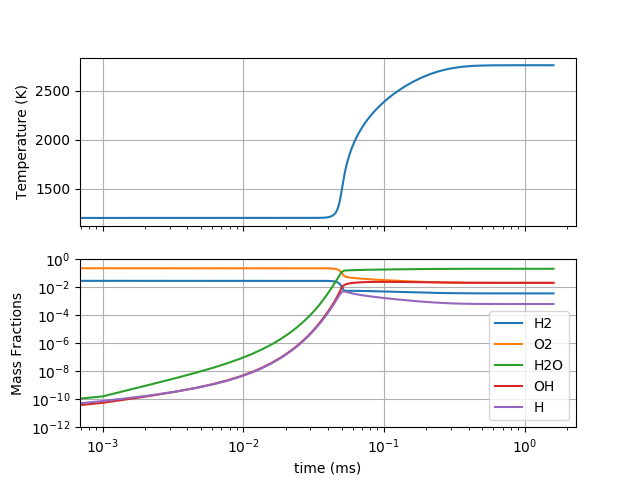

Ignition delay: 51.7 us


In [2]:
from spitfire.chemistry.mechanism import ChemicalMechanismSpec
from spitfire.chemistry.reactors import HomogeneousReactor

sm = ChemicalMechanismSpec(cantera_xml='mechanisms/h2-burke.xml', group_name='h2-burke')

h2 = sm.stream('X', 'H2:1')
air = sm.stream(stp_air=True)

mix = sm.mix_for_equivalence_ratio(phi=1.0, fuel=h2, oxy=air)
mix.TP = 1200, 101325

r = HomogeneousReactor(sm, mix,
                       configuration='isobaric',
                       heat_transfer='adiabatic',
                       mass_transfer='closed')

%matplotlib notebook
r.integrate_to_steady_after_ignition(plot=['H2', 'O2', 'H2O', 'OH', 'H'])

print('Ignition delay: {:.1f} us'.format(r.ignition_delay() * 1.e6))